<a href="https://colab.research.google.com/github/Ramyatummalapally/VTU19921/blob/main/Nephrolithicipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip"

unzip:  cannot find or open /content/drive/MyDrive/archive.zip, /content/drive/MyDrive/archive.zip.zip or /content/drive/MyDrive/archive.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

In [ ]:
data_dir='/content/drive/MyDrive/ramya'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 3957 files belonging to 4 classes.
Using 3562 files for training.
Found 3957 files belonging to 4 classes.
Using 791 files for validation.


In [ ]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'cyst', 1: 'normal', 2: 'stone', 3: 'tumour'}

In [ ]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


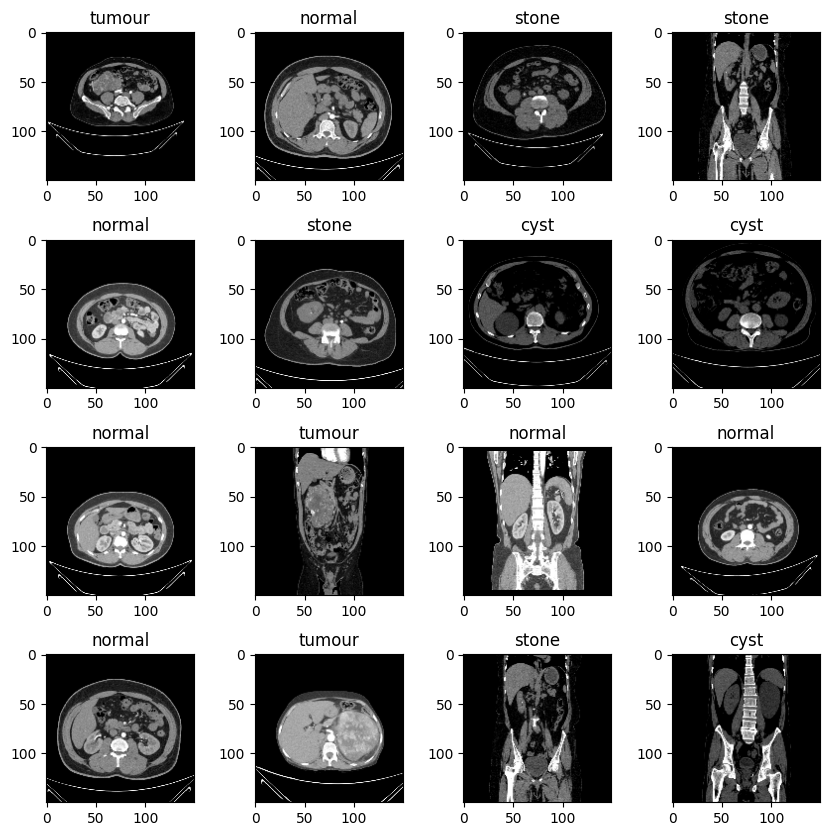

In [ ]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [ ]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
VGG_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,981,444 (57.15 MB)

 Trainable params: 265,732 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
epochs=15
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1348s 12s/step - accuracy: 0.9646 - loss: 0.1166 - val_accuracy: 0.9924 - val_loss: 0.1052
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1389s 12s/step - accuracy: 0.9817 - loss: 0.0652 - val_accuracy: 0.9962 - val_loss: 0.0395
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1315s 12s/step - accuracy: 0.9910 - loss: 0.0371 - val_accuracy: 0.9975 - val_loss: 0.0220
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1311s 12s/step - accuracy: 0.9978 - loss: 0.0214 - val_accuracy: 0.9949 - val_loss: 0.0392
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1369s 12s/step - accuracy: 0.9951 - loss: 0.0197 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1315s 12s/step - accuracy: 0.9980 - loss: 0.0173 - val_accuracy: 0.9937 - val_loss: 0.0253
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1365s 12s/step - accuracy: 0.9975 - loss: 0.0134 - val_accuracy: 0.9975 - val_loss: 0.0183
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 1318s 12s/step - accuracy: 0.9975 - loss: 0

In [ ]:
VGG_model.save("VGG_model.h5")

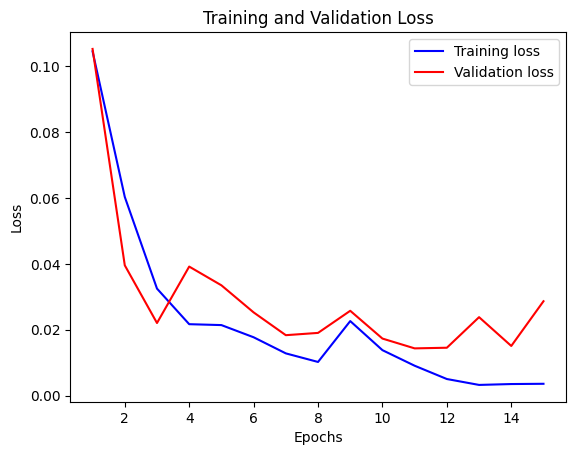

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

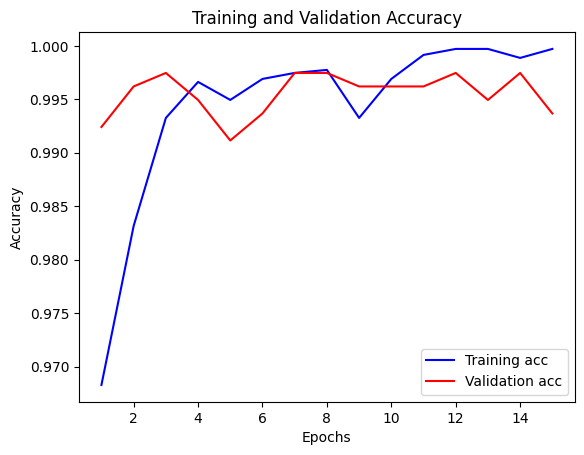

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

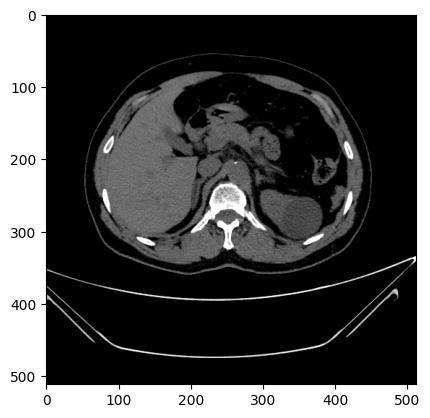

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'cyst'

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ramya/cyst/Cyst- (101).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [ ]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

<ipython-input-22-a414305bff42>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mobile_net.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,917,956 (11.13 MB)

 Trainable params: 658,948 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [ ]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 112s 936ms/step - accuracy: 0.7577 - loss: 0.6676 - val_accuracy: 0.9545 - val_loss: 0.1115
Epoch 2/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 128s 815ms/step - accuracy: 0.9777 - loss: 0.0733 - val_accuracy: 0.9924 - val_loss: 0.0262
Epoch 3/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 91s 817ms/step - accuracy: 0.9947 - loss: 0.0290 - val_accuracy: 0.9975 - val_loss: 0.0173
Epoch 4/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 95s 847ms/step - accuracy: 0.9967 - loss: 0.0161 - val_accuracy: 0.9962 - val_loss: 0.0190
Epoch 5/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 141s 837ms/step - accuracy: 0.9996 - loss: 0.0082 - val_accuracy: 0.9962 - val_loss: 0.0135
Epoch 6/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 141s 829ms/step - accuracy: 0.9987 - loss: 0.0099 - val_accuracy: 0.9962 - val_loss: 0.0138
Epoch 7/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 96s 857ms/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 8/15
112/112 ━━━━━━━━━━━━━━━━━━━━ 90s 810ms/step - accuracy: 0.9984 - los

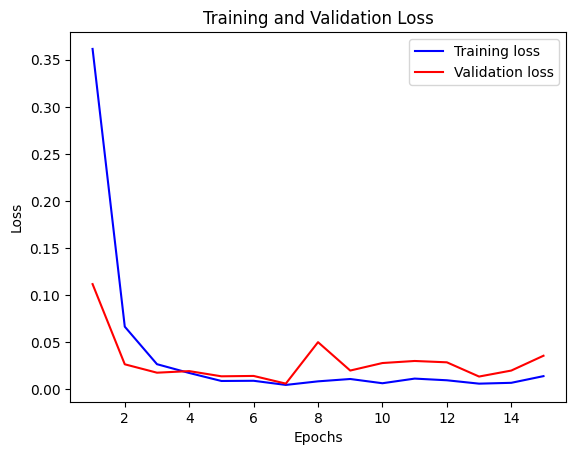

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

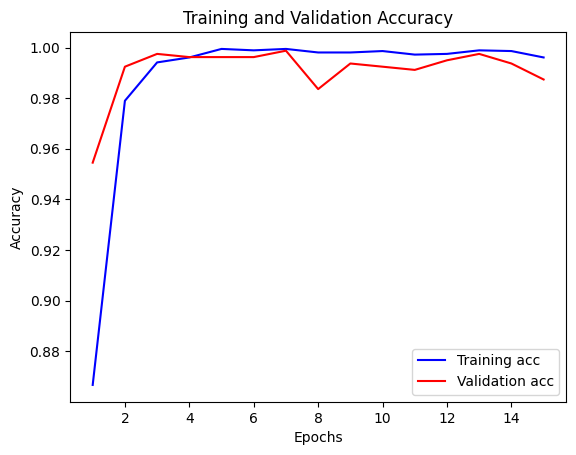

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

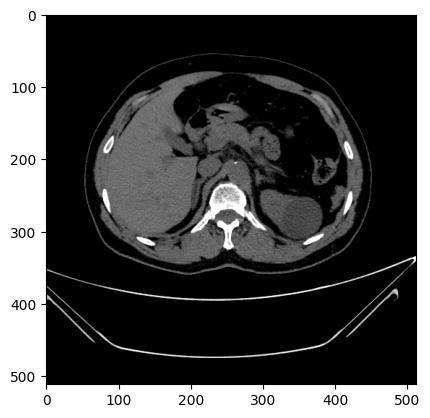

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'cyst'

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ramya/cyst/Cyst- (101).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]